In [6]:
import pandas as pd

def load_data(df):
    return pd.read_csv(file_path)

file_path = '../data/flight_df.csv' 

# Load dataset
df = load_data(file_path)
df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,...,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,3,4,0,0,1,1,1,0


In [7]:
from sklearn.model_selection import train_test_split

# Define target and features
y=df['satisfied']
X= df.drop(columns='satisfied')

# Split dataset
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

y.value_counts(normalize=True)

satisfied
0    0.56695
1    0.43305
Name: proportion, dtype: float64

In [8]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

def create_preprocessing_pipeline():

    # Select numeric and categorical
    num_cols = make_column_selector(dtype_include='number')
    cat_cols = make_column_selector(dtype_include='object')

    # instantiate transformers
    scaler = StandardScaler()
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    knn_imputer = KNNImputer(n_neighbors=2, weights='uniform')

    # Create pipeline 
    num_pipe =Pipeline([
        ('imputer',knn_imputer),
        ('scaler', scaler),
    ])

    cat_pipe =Pipeline([
        ('encoder', ohe)
    ])

    preprocessor = ColumnTransformer([
        ('numeric', num_pipe,num_cols),
        ('categorical',cat_pipe,cat_cols),
    ], remainder='drop')

    return preprocessor

# Create preprocessor object
preprocessor = create_preprocessing_pipeline()

In [10]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Create sampler pipeline
def make_sampler_pipeline(sampler):
    return ImbPipeline([
        ('sampler',sampler)
    ])

# Preprocess and rebalance data
def preprocess_and_rebalance_data(preprocessor, X_train,X_test,y_train):

    # Transform training data into fitted transformer
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_test_transformed= preprocessor.transform(X_test)

    # Create sampling pipeline
    sampler = make_sampler_pipeline(SMOTE(random_state=42))

    X_train_balanced,y_train_balanced= sampler.fit_resample(X_train_transformed,y_train)

    return X_train_balanced,X_test_transformed,y_train_balanced

    # Balance training data
X_train_balanced,X_test_transformed, y_train_balanced = preprocess_and_rebalance_data(preprocessor,X_train,X_test,y_train)

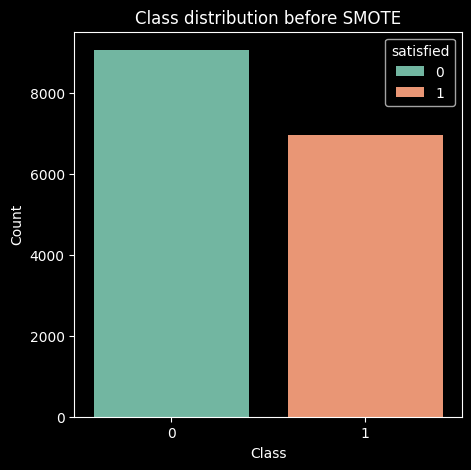

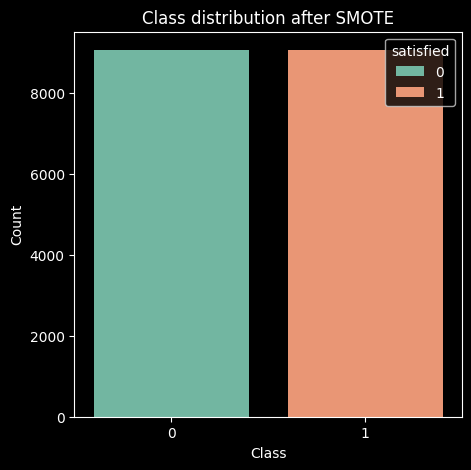

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Format all figure in dark mode
plt.style.use('dark_background')

# Visualize the data before and after SMOTE
def plot_call_distribution(y,title):
    plt.figure(figsize=(5,5))
    sns.countplot(x=y, palette='Set2',hue=y)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

# Before SMOTE
plot_call_distribution(y_train,title='Class distribution before SMOTE')

plot_call_distribution(y_train_balanced,title='Class distribution after SMOTE')